# KMeans

In [ ]:
#KMeans clustering is unsupervised ML. Initially two centriod(or any points) points are assigned randomly.
#Find out distance between every point to mentioned two centriod. This process continued till repositioning stops. 
#Example if we assume k1 is 7 and k2 is 25 then mean of that cluster is same then we will have to stop.

#KMeans clustering works on distance measures.

#Clustering - Hierarchical Clustering and Partioning(Centriod) clustering.
#Partioning clustering - Kmeans and Fuzzy C mean
#Hierarchical Clustering (Tree Structure) - Divisive (Top Down Approach) and Agglomeritive (Bottom up approach)

#in K means object cannot belongs to more than one clusters but in fuzzy it can belong to one and more clusters.
# We will use the Euclidean distance measure for Kmeans. It is SQTp2 -SQTq2 of points p and q.  

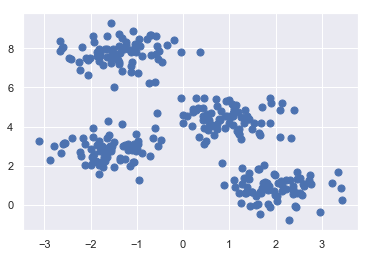

In [9]:
#Problem -Walmart wants to open the chain of stores across florida and want to find out the store location to optimize the revenue.
#Solution - Walmart can use its online customer data to analyse the customers loactions (Address) along with mothly sales.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling 
import numpy as np

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300,centers=4, cluster_std=0.60,random_state=0)
#X.shape()
#y_true
plt.scatter(X[:,0],X[:,1],s=50);

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

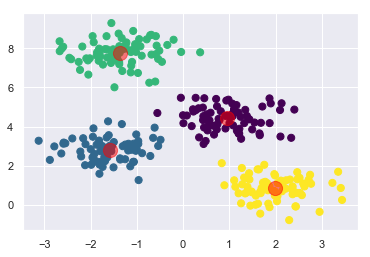

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1.Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers=X[i]
    
    while True:
        #2a. Assign lables based on closest center
        lables=pairwise_distances_argmin(X,centers)
        
        #2b. Find new centers from mean of points
        new_centers = np.array([X[lables == i].mean(0)
                               for i in range(n_clusters)])
        
        #2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers =new_centers
        
    return centers, lables  

centers, lables = find_clusters(X,4)

plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:,0],centers[:,1], c= 'red', s=200, alpha=0.5);

In [ ]:
########################## Exercise #######################
    #Color comparision of flower image 